In [ ]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.


Analyzing drift for numeric attribute: 'Numeric Feature'
--------------------------------------------------


/tmp/ipykernel_5060/670545799.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=[reference_data, current_data], palette=['blue', 'orange'])


UnboundLocalError: local variable 'boxprops' referenced before assignment

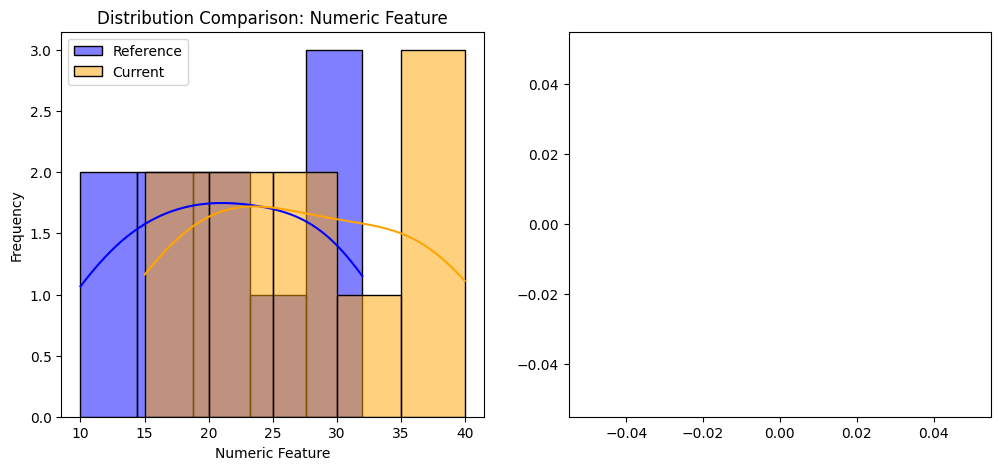

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, mannwhitneyu

def detect_numeric_drift(reference_data: pd.Series, current_data: pd.Series, column_name: str):
    """
    Detects potential data drift for a numeric attribute between two time periods.

    Args:
        reference_data (pd.Series): The numeric data from the reference time period.
        current_data (pd.Series): The numeric data from the current time period.
        column_name (str): The name of the attribute being analyzed.
    """
    print(f"Analyzing drift for numeric attribute: '{column_name}'")
    print("-" * 50)

    # 1. Visual Comparison
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(reference_data, kde=True, label='Reference', color='blue')
    sns.histplot(current_data, kde=True, label='Current', color='orange')
    plt.title(f'Distribution Comparison: {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(data=[reference_data, current_data], palette=['blue', 'orange'])
    plt.xticks([0, 1], ['Reference', 'Current'])
    plt.title(f'Box Plot Comparison: {column_name}')
    plt.ylabel(column_name)

    plt.tight_layout()
    plt.show()

    # 2. Statistical Tests
    print("\nStatistical Tests:")

    # Kolmogorov-Smirnov Test
    ks_statistic, ks_p_value = ks_2samp(reference_data, current_data)
    print(f"Kolmogorov-Smirnov Test:")
    print(f"  Statistic: {ks_statistic:.4f}")
    print(f"  P-value: {ks_p_value:.4f}")
    if ks_p_value < 0.05:
        print("  Significant difference in distributions detected (p < 0.05).")
    else:
        print("  No significant difference in distributions detected (p >= 0.05).")

    # Mann-Whitney U Test
    mw_statistic, mw_p_value = mannwhitneyu(reference_data, current_data, alternative='two-sided')
    print(f"\nMann-Whitney U Test:")
    print(f"  Statistic: {mw_statistic:.4f}")
    print(f"  P-value: {mw_p_value:.4f}")
    if mw_p_value < 0.05:
        print("  Significant difference in central tendency detected (p < 0.05).")
    else:
        print("  No significant difference in central tendency detected (p >= 0.05).")

    # 3. Statistical Measures
    print("\nDescriptive Statistics Comparison:")
    reference_desc = reference_data.describe()
    current_desc = current_data.describe()
    comparison_df = pd.DataFrame({'Reference': reference_desc, 'Current': current_desc})
    print(comparison_df)

if __name__ == '__main__':
    # Example Usage:
    # Create sample Pandas Series for two time periods
    reference_values = pd.Series([10, 12, 15, 18, 20, 22, 25, 28, 30, 32])
    current_values = pd.Series([15, 17, 20, 23, 25, 28, 32, 35, 38, 40])

    detect_numeric_drift(reference_values, current_values, 'Numeric Feature')

    # Example with more distinct drift
    reference_values_2 = pd.Series([5, 7, 9, 11, 13, 15, 17, 19, 21, 23])
    current_values_2 = pd.Series([10, 12, 14, 16, 18, 20, 22, 30, 32, 34])
    detect_numeric_drift(reference_values_2, current_values_2, 'Another Numeric Feature')